<a href="https://colab.research.google.com/github/harshithareddy2929/FMML_Project_and_Labs/blob/main/lab_4_module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#QUESTION 1)Try to run the same experiment after filtering different features, 2 at a time.

Accuracy on the test set: 0.974



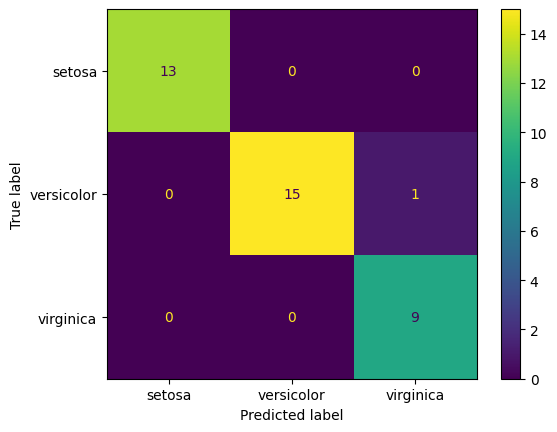

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


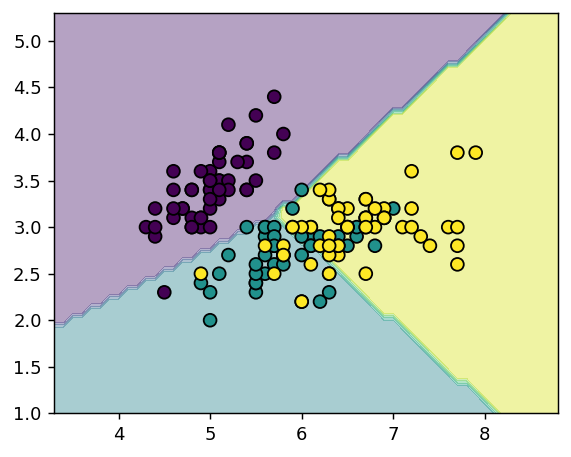

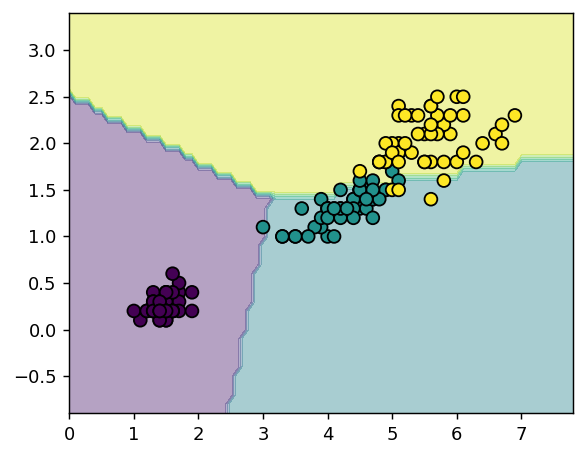

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


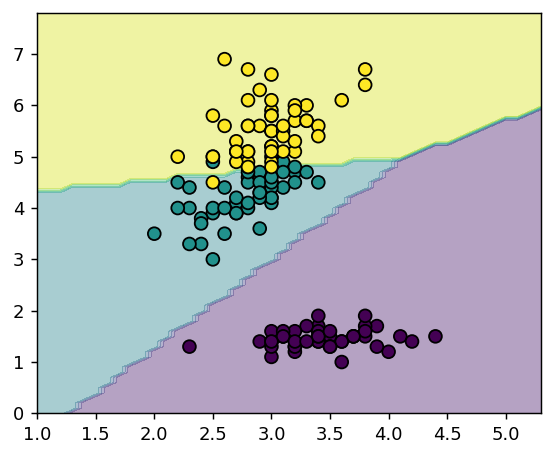

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


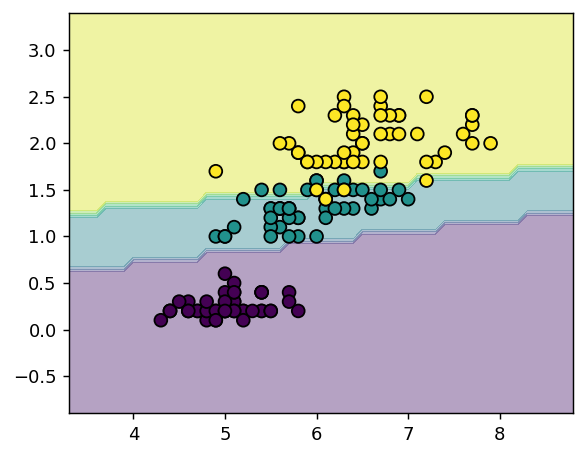

In [1]:

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

def plotDecisionBoundary(X, y, pair, clf):
    x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
    y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_pred = y_pred.reshape(xx.shape)
    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, y_pred, alpha=0.4)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c=y, s=50, edgecolor='k')
    plt.gcf().set_dpi(130)
    plt.show()

def boundaryExp_with_feature_pairs(X, y, pair):
    clf = svm.LinearSVC()
    clf.fit(X[:, pair], y)
    plotDecisionBoundary(X, y, pair, clf)

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy on the test set: {:.3f}\n".format(accuracy_score(y_pred, y_test)))

class_names = iris["target_names"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='.0f')
plt.show()

feature_pairs = [(0, 1), (2, 3), (1, 2), (0, 3)]

for pair in feature_pairs:
    boundaryExp_with_feature_pairs(X, y, pair)

#QUESTION 2)Using different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

Accuracy with linear kernel: 0.998


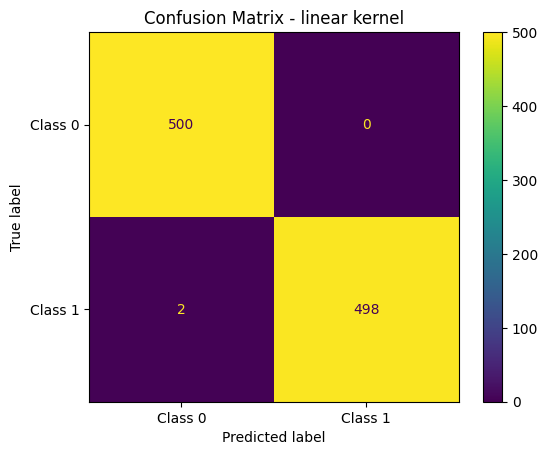

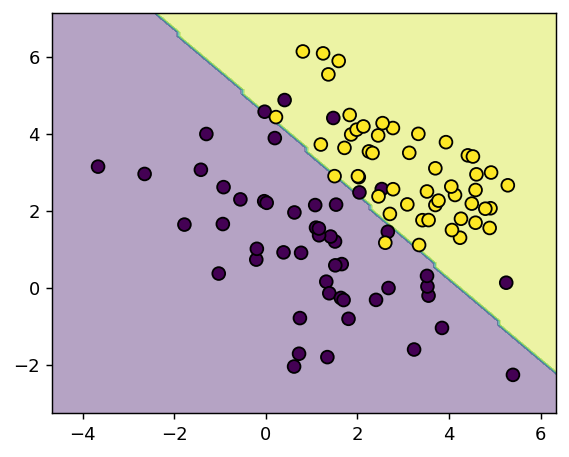

Accuracy with poly kernel: 0.993


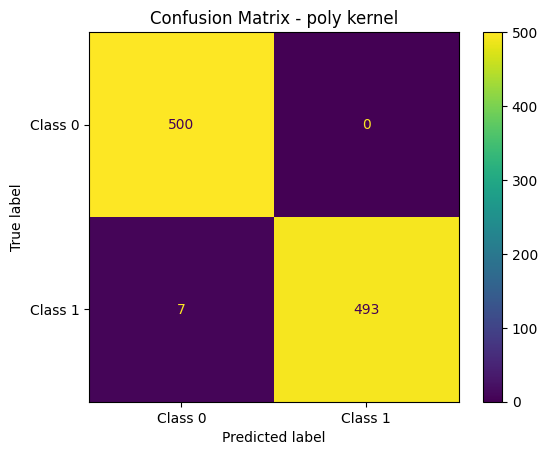

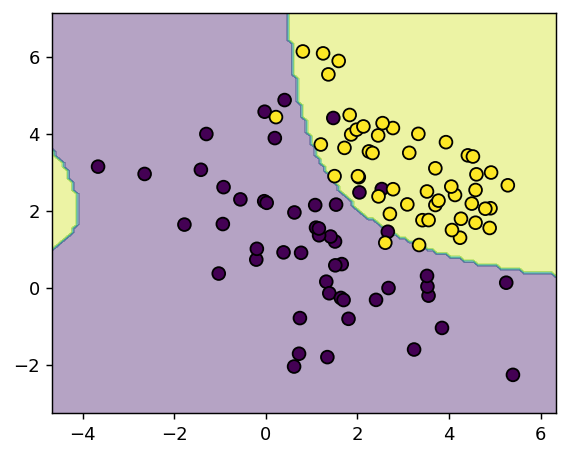

Accuracy with rbf kernel: 0.996


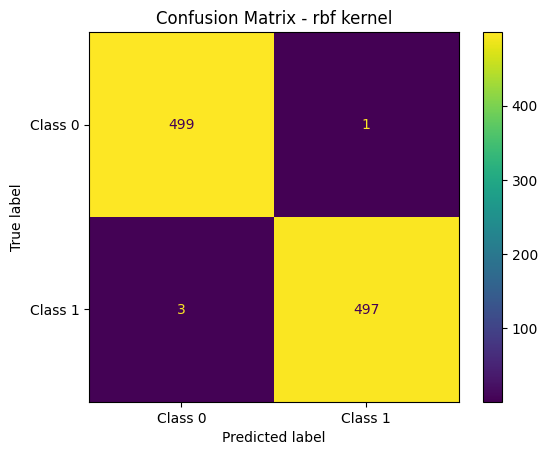

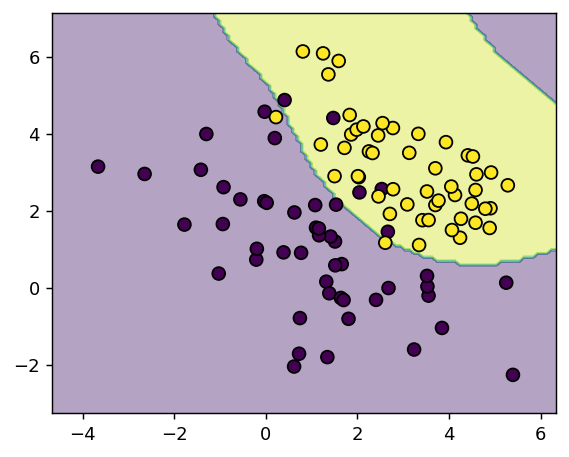

Accuracy with sigmoid kernel: 0.159


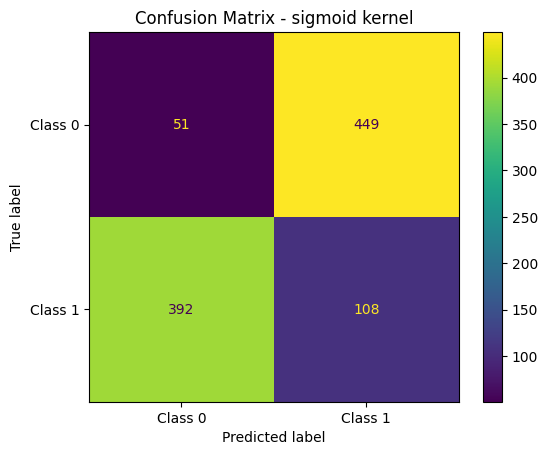

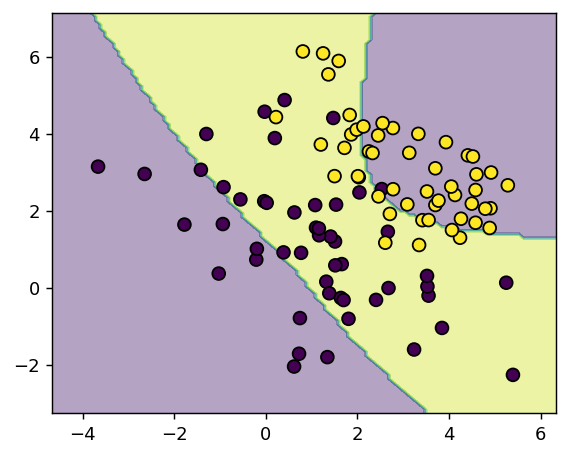

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

ar = np.vstack([\
                np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size=50),
                np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size=50)
                ])

testAr = np.vstack([\
                    np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size=500),
                    np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size=500)
                    ])

testy = np.array([0] * int((testAr.shape[0] / 2)) + [1] * int((testAr.shape[0] / 2)))

X = ar
y = np.array([0] * int((ar.shape[0] / 2)) + [1] * int((ar.shape[0] / 2)))

def plotDecisionBoundary(X, y, pair, clf):
    x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
    y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_pred = y_pred.reshape(xx.shape)
    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, y_pred, alpha=0.4)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c=y, s=50, edgecolor='k')
    plt.gcf().set_dpi(130)
    plt.show()

def boundaryExp_with_kernel(X, y, kernel):
    clf = svm.SVC(kernel=kernel)
    clf.fit(X, y)
    pair = [0, 1]
    plotDecisionBoundary(X, y, pair, clf)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X, y)

    y_pred = clf.predict(testAr)
    accuracy = accuracy_score(testy, y_pred)

    print(f"Accuracy with {kernel} kernel: {accuracy:.3f}")

    class_names = ["Class 0", "Class 1"]
    cm = confusion_matrix(testy, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='viridis', values_format='.0f')
    plt.title(f"Confusion Matrix - {kernel} kernel")
    plt.show()

    boundaryExp_with_kernel(X, y, kernel)